<a href="https://colab.research.google.com/github/eminshall/Demand_Forecasting/blob/main/Demand_Forecasting_Triple_Exponential_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
pd.options.mode.chained_assignment = None

from google.colab import drive

from datetime import datetime

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
data_raw = pd.read_csv('/content/drive/MyDrive/online_retail_II.csv')
data = pd.DataFrame(data_raw)

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#Our data doesn't have a sales column so we need to make one
data['Sales'] = data.Price * data.Quantity

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
# Select One item with > 2000 rows
data = data[data['StockCode'] == '21232']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
231,489461,21232,STRAWBERRY CERAMIC TRINKET BOX,48,2009-12-01 10:49:00,1.25,17865.0,United Kingdom,60.00
841,489536,21232,STRAWBERRY CERAMIC TRINKET BOX,3,2009-12-01 12:13:00,1.25,16393.0,United Kingdom,3.75
910,489537,21232,STRAWBERRY CERAMIC TRINKET BOX,20,2009-12-01 12:14:00,1.25,14040.0,United Kingdom,25.00
1004,489546,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2009-12-01 12:30:00,1.25,14156.0,EIRE,15.00


In [6]:
#Drop features that are the same for every row
data = data.drop(['Description','Invoice','StockCode','Price'], axis=1)

data.head()

,Quantity,InvoiceDate,Customer ID,Country,Sales
4,24,2009-12-01 07:45:00,13085.0,United Kingdom,30.00
231,48,2009-12-01 10:49:00,17865.0,United Kingdom,60.00
841,3,2009-12-01 12:13:00,16393.0,United Kingdom,3.75
910,20,2009-12-01 12:14:00,14040.0,United Kingdom,25.00
1004,12,2009-12-01 12:30:00,14156.0,EIRE,15.00


In [7]:
# Change Column name - I'm lazy
data = data.rename(columns = {'InvoiceDate': 'Date'})

In [8]:
#Reformat the Date to a lower resolution
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m')

data['Date'] = pd.to_datetime(data['Date'])

In [9]:
df = data.groupby(data.Date.dt.date).agg({'Sales': 'sum'}).reset_index()

In [10]:
# Set Date as Index
df.set_index('Date', inplace=True)

In [11]:
df.shape

(25, 1)

# Simple Exponential Smoothing

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


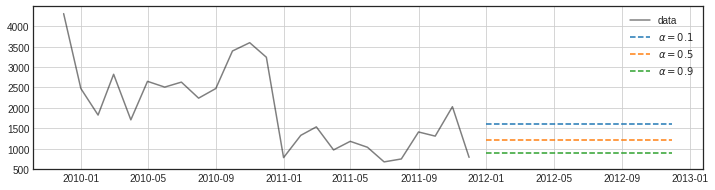

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(df, color='k', alpha=0.5)
alphas = [0.1, 0.5, 0.9]
for alpha in alphas:
    model = SimpleExpSmoothing(df, initialization_method="estimated").fit(smoothing_level=alpha)
    forecast= model.forecast(12)
    ax.plot(forecast, linestyle='--')
ax.legend(['data'] + [r"$\alpha=%s$" % a for a in alphas])
ax.grid(True)

# Double Exponential Smoothing

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


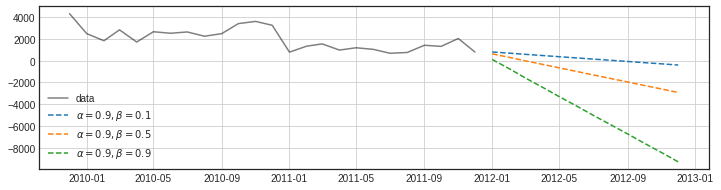

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(df, color='k', alpha=0.5)
alpha = 0.9
betas = [0.1, 0.5, 0.9]
for beta in betas:
    model = Holt(df, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast= model.forecast(12)
    ax.plot(forecast, linestyle='--')
ax.legend(['data'] + [r"$\alpha=%s, \beta=%s$" % (alpha, b) for b in betas])
ax.grid(True)

# Triple Exponential Smoothing (Holt-Winter's)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


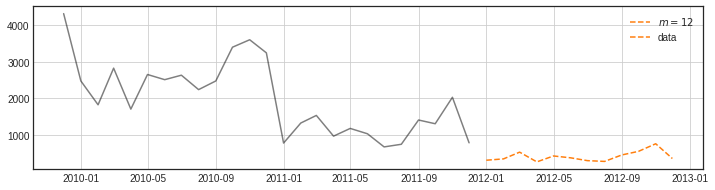

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
model = ExponentialSmoothing(df, 
        seasonal_periods=12,
        trend="add",
        seasonal="add",
        use_boxcox=True).fit()
forecast= model.forecast(12)
ax.plot(pd.concat([df[-1:], forecast[:1]]), linestyle='--', color='C1')
ax.plot(df, color='k', alpha=0.5)
ax.plot(forecast, linestyle='--', color='C1')
ax.legend(['$m=12$', 'data'])
ax.grid(True)

# Probabilistic Forecasting

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


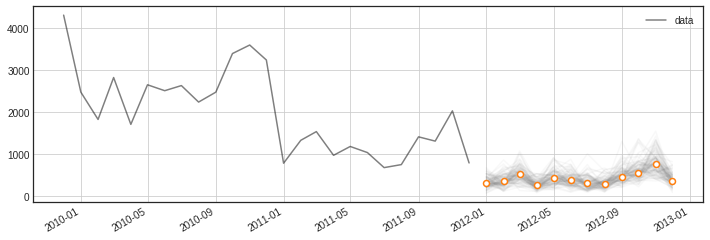

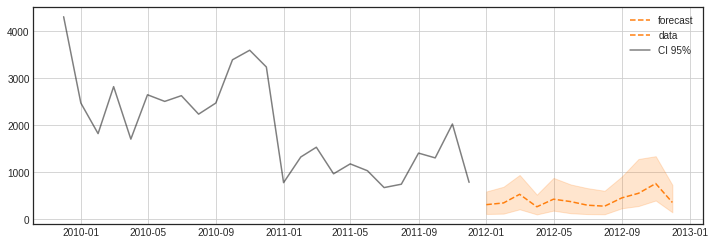

In [15]:
model = ExponentialSmoothing(df, 
        seasonal_periods=12,
        trend="add",
        seasonal="add",
        use_boxcox=True).fit()
forecast= model.forecast(12)
simulations = model.simulate(12, repetitions=100, error="add")

#
# Simulation
#
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df, color='k', alpha=0.5)
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
ax.plot(forecast, marker='o', linestyle='None', markerfacecolor='white', markeredgewidth=1.5, color='C1')
ax.legend(['data'])
ax.grid(True)

#
# Confidence intervals
#
upper_ci = simulations.quantile(q=0.975, axis='columns')
lower_ci = simulations.quantile(q=0.025, axis='columns')
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(pd.concat([df[-1:], forecast[:1]]), linestyle='--', color='C1')
ax.plot(df, color='k', alpha=0.5)
ax.fill_between(forecast.index, lower_ci[-12:], upper_ci[-12:], alpha=0.2, color='C1')
ax.plot(forecast, linestyle='--', color='C1')
ax.legend(['forecast', 'data', 'CI 95%'])
ax.grid(True)

# Decomposition

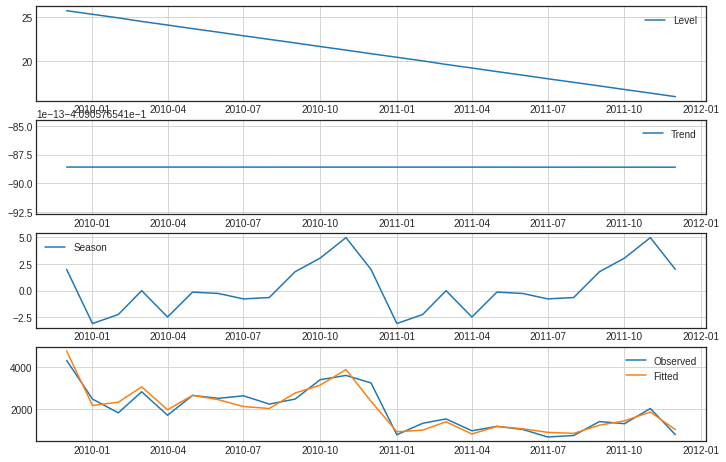

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
ax[0].plot(model.level, label='Level')
ax[1].plot(model.trend, label='Trend')
ax[2].plot(model.season, label='Season')
ax[3].plot(df, label='Observed')
ax[3].plot(model.fittedvalues, label='Fitted')
for i in range(len(ax)):
    ax[i].grid(True)
    ax[i].legend()
plt.show()

# Again By Week Instead of Month

In [17]:
data2 = pd.DataFrame(data_raw)

In [18]:
#Reformat the Date to a lower resolution
data2['Date'] = pd.to_datetime(data2['InvoiceDate']).dt.strftime('%Y-%m-%d')

data2['Date'] = pd.to_datetime(data2['InvoiceDate'])

In [19]:
data2 = data2[data2['StockCode'] == '21232']

In [20]:
df1 = data2.groupby(data2.Date.dt.date).agg({'Sales': 'sum'}).reset_index()

In [21]:
df1 = data2.resample('w', on='Date').agg({'Sales': 'sum'}).reset_index()

In [22]:
df1.head()

,Date,Sales
0,2009-12-06,1229.62
1,2009-12-13,1335.47
2,2009-12-20,1684.28
3,2009-12-27,59.11
4,2010-01-03,0.00


In [23]:
# Taking the last 40 weeks
df1 = df1[-40:]

In [25]:
ts = df1.set_index(df1.Date)

In [29]:
ts = ts.drop('Date', axis=1)

# Simple Exponential Smoothing by Week

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


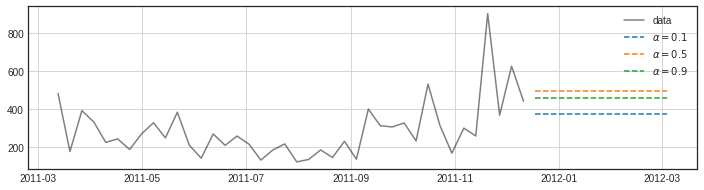

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(ts, color='k', alpha=0.5)
alphas = [0.1, 0.5, 0.9]
for alpha in alphas:
    model = SimpleExpSmoothing(ts, initialization_method="estimated").fit(smoothing_level=alpha)
    forecast= model.forecast(12)
    ax.plot(forecast, linestyle='--')
ax.legend(['data'] + [r"$\alpha=%s$" % a for a in alphas])
ax.grid(True)

# Double Exponential Smoothing (Holt's)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


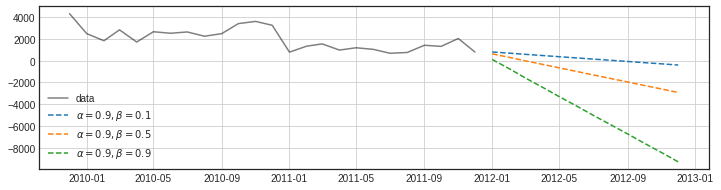

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(df, color='k', alpha=0.5)
alpha = 0.9
betas = [0.1, 0.5, 0.9]
for beta in betas:
    model = Holt(df, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta)
    forecast= model.forecast(12)
    ax.plot(forecast, linestyle='--')
ax.legend(['data'] + [r"$\alpha=%s, \beta=%s$" % (alpha, b) for b in betas])
ax.grid(True)

# Triple Exponential Smoothing (Holt-Winter's)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


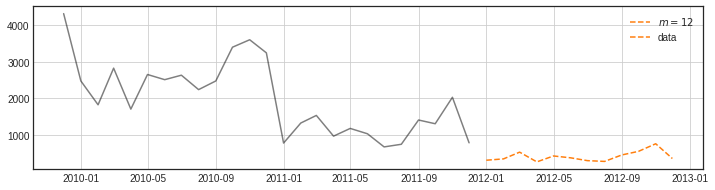

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
model = ExponentialSmoothing(df, 
        seasonal_periods=12,
        trend="add",
        seasonal="add",
        use_boxcox=True).fit()
forecast= model.forecast(12)
ax.plot(pd.concat([df[-1:], forecast[:1]]), linestyle='--', color='C1')
ax.plot(df, color='k', alpha=0.5)
ax.plot(forecast, linestyle='--', color='C1')
ax.legend(['$m=12$', 'data'])
ax.grid(True)

# Probabilistic Forecasting

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


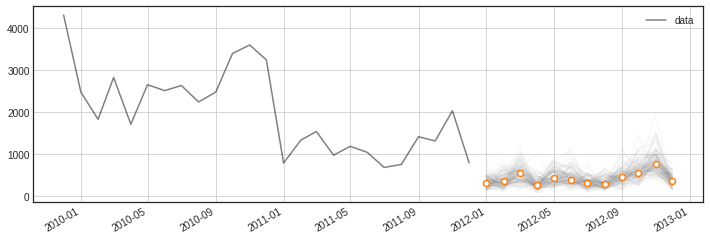

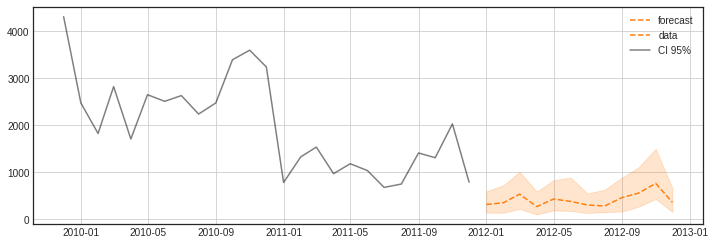

In [34]:
odel = ExponentialSmoothing(df, 
        seasonal_periods=12,
        trend="add",
        seasonal="add",
        use_boxcox=True).fit()
forecast= model.forecast(12)
simulations = model.simulate(12, repetitions=100, error="add")

#
# Simulation
#
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df, color='k', alpha=0.5)
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
ax.plot(forecast, marker='o', linestyle='None', markerfacecolor='white', markeredgewidth=1.5, color='C1')
ax.legend(['data'])
ax.grid(True)

#
# Confidence intervals
#
upper_ci = simulations.quantile(q=0.975, axis='columns')
lower_ci = simulations.quantile(q=0.025, axis='columns')
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(pd.concat([df[-1:], forecast[:1]]), linestyle='--', color='C1')
ax.plot(df, color='k', alpha=0.5)
ax.fill_between(forecast.index, lower_ci[-12:], upper_ci[-12:], alpha=0.2, color='C1')
ax.plot(forecast, linestyle='--', color='C1')
ax.legend(['forecast', 'data', 'CI 95%'])
ax.grid(True)

# Decomposition

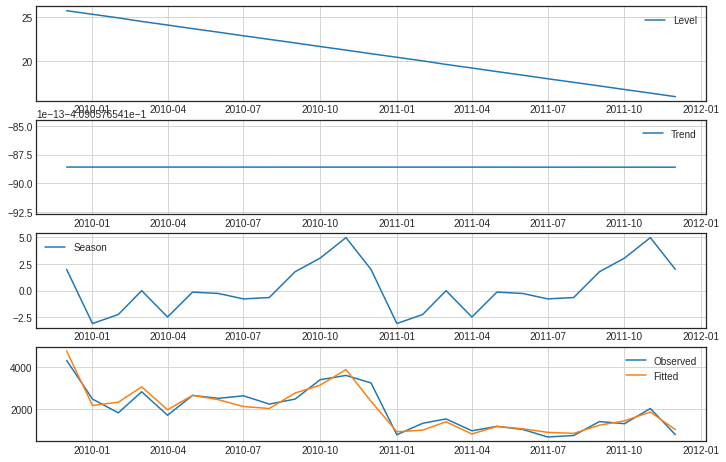

In [35]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
ax[0].plot(model.level, label='Level')
ax[1].plot(model.trend, label='Trend')
ax[2].plot(model.season, label='Season')
ax[3].plot(df, label='Observed')
ax[3].plot(model.fittedvalues, label='Fitted')
for i in range(len(ax)):
    ax[i].grid(True)
    ax[i].legend()
plt.show()